# Preprocessing the data

In [20]:
import pandas as pd
import re

In [21]:
df = pd.read_csv('data_tau_ta.csv')

In [22]:
df.head()

,title,date,days,tokens,stem,lemma,pos_tags,named_entities
0,Deep Advances in Generative Modeling,6 points by gwulfs 5 hours ago | discuss,1,"deep,advances,generative,modeling",Deep Advances in Generative Model,Deep Advances in Generative Modeling,"[('Deep', 'JJ'), ('Advances', 'NNS'), ('in', '...",['Generative Modeling']
1,A Neural Network in 11 lines of Python,2 points by dekhtiar 5 hours ago | discuss,1,"neural,network,11,lines,python",A Neural Network in 11 lines of Python,A Neural Network in 11 lines of Python,"[('A', 'DT'), ('Neural', 'NNP'), ('Network', '...",['Python']
2,"Python, Machine Learning, and Language Wars",3 points by pmigdal 7 hours ago | discuss,1,"python,machine,learning,language,wars","Python, Machine Learning, and Language War","Python, Machine Learning, and Language Wars","[('Python', 'NNP'), (',', ','), ('Machine', 'N...","['Python', 'Machine Learning', 'Language Wars']"
3,Markov Chains Explained Visually,11 points by zeroviscosity 1 day ago | 1 comment,1,"markov,chains,explained,visually",Markov Chains Explained Visu,Markov Chains Explained Visually,"[('Markov', 'NNP'), ('Chains', 'NNP'), ('Expla...","['Markov Chains', 'Visually']"
4,Dplython: Dplyr for Python,10 points by thenaturalist 1 day ago | 3 comm...,1,"dplython,dplyr,python",Dplython: Dplyr for Python,Dplython: Dplyr for Python,"[('Dplython', 'NN'), (':', ':'), ('Dplyr', 'NN...","['Dplython', 'Python']"


In [23]:
#Shape == Return a tuple representing the dimensionality of the DataFrame.
df.shape

(180, 8)

In [24]:
import nltk

In [25]:
from nltk.corpus import stopwords

In [26]:
stop = stopwords.words('english')


In [27]:
stop.extend(('.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}','/','-','#','&','***'))

In [28]:
tokens_list = df['tokens'].tolist()

In [29]:
tokens_list

['deep,advances,generative,modeling',
 'neural,network,11,lines,python',
 'python,machine,learning,language,wars',
 'markov,chains,explained,visually',
 'dplython,dplyr,python',
 'inferring,causal,impact,using,bayesian,structural,time,series,models',
 'tutorial,web,scraping,mapping,breweries,import,io,r',
 'billion,taxi,rides,amazon,emr,running,spark',
 'rise,greedy,robots',
 'extracting,image,metadata,scale',
 'python,data,structures,algorithms,interviews',
 'lift,charts,data,scientist,secret,weapon',
 'become,machine,learning,expert,one,simple,step',
 'data,science,side,project',
 'simple,estimation,hierarchical,events,petersburg',
 'engineers,write,etl,high,functioning,data,science,departments',
 'unsupervised,computer,vision,current,state,art',
 'data,visualization,tools,r,dataisbeautiful,oc,creators,use',
 'data,engineering,slack,twelve,mistakes,made,first,three,months',
 'unusual,interactive,machine,learning,challenge',
 'datumbox,machine,learning,framework,0,7,0,released',
 'res

In [30]:
# Let us get the frequency count
frequency_words = {}
for data in tokens_list:
    #data = data.replace("[","")
    #data = data.replace("]","")
    #data = data.replace("'","")
    data_list = data.split(',')
    print(data_list)
    for token in data_list:
        token = token.rstrip()
        token = token.lstrip()
        if token not in stop:
            if token in frequency_words:
                count = frequency_words[token]
                count = count + 1
                frequency_words[token] = count
            else:
                frequency_words[token] = 1

['deep', 'advances', 'generative', 'modeling']
['neural', 'network', '11', 'lines', 'python']
['python', 'machine', 'learning', 'language', 'wars']
['markov', 'chains', 'explained', 'visually']
['dplython', 'dplyr', 'python']
['inferring', 'causal', 'impact', 'using', 'bayesian', 'structural', 'time', 'series', 'models']
['tutorial', 'web', 'scraping', 'mapping', 'breweries', 'import', 'io', 'r']
['billion', 'taxi', 'rides', 'amazon', 'emr', 'running', 'spark']
['rise', 'greedy', 'robots']
['extracting', 'image', 'metadata', 'scale']
['python', 'data', 'structures', 'algorithms', 'interviews']
['lift', 'charts', 'data', 'scientist', 'secret', 'weapon']
['become', 'machine', 'learning', 'expert', 'one', 'simple', 'step']
['data', 'science', 'side', 'project']
['simple', 'estimation', 'hierarchical', 'events', 'petersburg']
['engineers', 'write', 'etl', 'high', 'functioning', 'data', 'science', 'departments']
['unsupervised', 'computer', 'vision', 'current', 'state', 'art']
['data', 'vis

In [31]:
frequency_words['data']

41

# Term Frequency and Inverse Document Frequency

In [32]:
df_tfidf = pd.DataFrame(data=list(frequency_words.items()),columns=['word','tf'])

In [33]:
df_tfidf.head()

,word,tf
0,code,4
1,dezyre,1
2,results,2
3,four,1
4,ge,1


In [34]:
df_tfidf.sort_values(ascending=False, by = "tf", inplace=True)

In [35]:
df_tfidf.head()

,word,tf
151,data,41
415,learning,23
31,science,18
139,machine,16
295,r,11


In [36]:
def get_documents_count(row):
    document_counter = 0
    word = row['word']
    for document in df.tokens:
        document = document.replace("'",'')
        document = document.replace("[",'')
        document = document.replace("]",'')
        document = document.split(',')
        document = map(str.strip,document)
        if word in document:
            document_counter = document_counter + 1
    return document_counter

In [37]:
df_tfidf['document_count'] = df_tfidf.apply(get_documents_count,axis=1)

In [38]:
df_tfidf.head()

,word,tf,document_count
151,data,41,38
415,learning,23,23
31,science,18,18
139,machine,16,16
295,r,11,11


In [39]:
df_tfidf.tail()

,word,tf,document_count
243,owners,1,1
244,dirichlet,1,1
246,categorical,1,1
247,viewing,1,1
655,flyelephant,1,1


In [40]:
# we already have the count of all the documents
total_docs = df.shape[0]

In [41]:
total_docs

180

In [42]:
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
def compute_tfidf(row):
    idf = math.log10(total_docs/row['document_count'])
    return row['tf'] * idf

In [44]:
df_tfidf['tfidf'] = df_tfidf.apply(compute_tfidf,axis=1)

In [45]:
df_tfidf.head()

,word,tf,document_count,tfidf
151,data,41,38,24.684460
415,learning,23,23,19.437255
31,science,18,18,18.000000
139,machine,16,16,16.662283
295,r,11,11,13.245320


In [46]:
df_tfidf.tail()

,word,tf,document_count,tfidf
243,owners,1,1,2.255273
244,dirichlet,1,1,2.255273
246,categorical,1,1,2.255273
247,viewing,1,1,2.255273
655,flyelephant,1,1,2.255273


In [47]:
df_tfidf.sort_values(by='tfidf',ascending=True,inplace=True)

In [48]:
df_tfidf.head()

,word,tf,document_count,tfidf
598,ligo,1,1,2.255273
148,mapping,1,1,2.255273
149,fatigue,1,1,2.255273
150,courses,1,1,2.255273
152,parallel,1,1,2.255273


In [49]:
df_tfidf.replace(to_replace=0.0,value=0.1,inplace=True)

In [50]:
df_tfidf.tail()

,word,tf,document_count,tfidf
295,r,11,11,13.245320
139,machine,16,16,16.662283
31,science,18,18,18.000000
415,learning,23,23,19.437255
151,data,41,38,24.684460


In [51]:
df_tfidf.set_index('word', inplace=True)

In [52]:
df_tfidf.head()

,tf,document_count,tfidf
word,,,
ligo,1,1,2.255273
mapping,1,1,2.255273
fatigue,1,1,2.255273
courses,1,1,2.255273
parallel,1,1,2.255273


In [53]:
wordcloud = WordCloud()

In [54]:
word_tfidf = df_tfidf['tfidf'].to_dict()

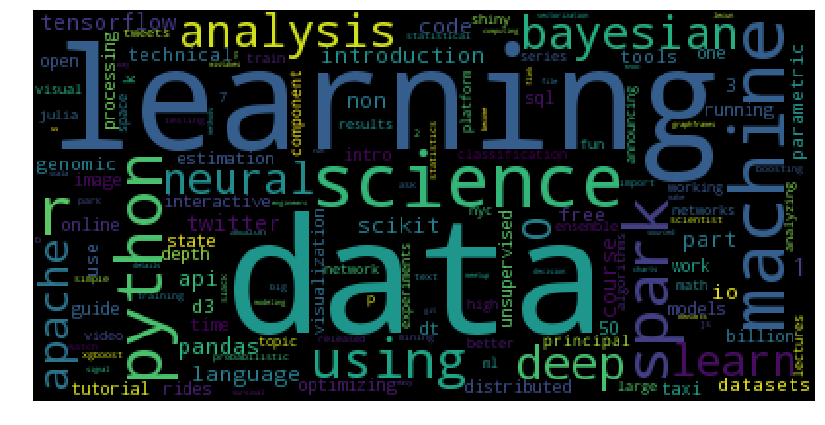

In [55]:
wordcloud.generate_from_frequencies(word_tfidf)
plt.figure(figsize=(14,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Sentimen Analisis

In [56]:
from nltk.classify import NaiveBayesClassifier
import math
import collections

In [57]:
pos_features = []
neg_features = []

In [58]:
def make_full_dict(word):
    return dict([(word, True)])

In [59]:
with open('postive_words.txt','r') as posFile:
    lines = posFile.readlines()
    for line in lines:
        pos_features.append([make_full_dict(line.rstrip()),'pos'])
        

In [60]:
pos_features

[[{'a+': True}, 'pos'],
 [{'abound': True}, 'pos'],
 [{'abounds': True}, 'pos'],
 [{'abundance': True}, 'pos'],
 [{'abundant': True}, 'pos'],
 [{'accessable': True}, 'pos'],
 [{'accessible': True}, 'pos'],
 [{'acclaim': True}, 'pos'],
 [{'acclaimed': True}, 'pos'],
 [{'acclamation': True}, 'pos'],
 [{'accolade': True}, 'pos'],
 [{'accolades': True}, 'pos'],
 [{'accommodative': True}, 'pos'],
 [{'accomodative': True}, 'pos'],
 [{'accomplish': True}, 'pos'],
 [{'accomplished': True}, 'pos'],
 [{'accomplishment': True}, 'pos'],
 [{'accomplishments': True}, 'pos'],
 [{'accurate': True}, 'pos'],
 [{'accurately': True}, 'pos'],
 [{'achievable': True}, 'pos'],
 [{'achievement': True}, 'pos'],
 [{'achievements': True}, 'pos'],
 [{'achievible': True}, 'pos'],
 [{'acumen': True}, 'pos'],
 [{'adaptable': True}, 'pos'],
 [{'adaptive': True}, 'pos'],
 [{'adequate': True}, 'pos'],
 [{'adjustable': True}, 'pos'],
 [{'admirable': True}, 'pos'],
 [{'admirably': True}, 'pos'],
 [{'admiration': True}, 'p

In [61]:
with open('negative_words.txt','r') as negFile:
    lines = negFile.readlines()
    for line in lines:
        neg_features.append([make_full_dict(line.rstrip()),'neg'])

In [62]:
neg_features

[[{'2-faced': True}, 'neg'],
 [{'2-faces': True}, 'neg'],
 [{'abnormal': True}, 'neg'],
 [{'abolish': True}, 'neg'],
 [{'abominable': True}, 'neg'],
 [{'abominably': True}, 'neg'],
 [{'abominate': True}, 'neg'],
 [{'abomination': True}, 'neg'],
 [{'abort': True}, 'neg'],
 [{'aborted': True}, 'neg'],
 [{'aborts': True}, 'neg'],
 [{'abrade': True}, 'neg'],
 [{'abrasive': True}, 'neg'],
 [{'abrupt': True}, 'neg'],
 [{'abruptly': True}, 'neg'],
 [{'abscond': True}, 'neg'],
 [{'absence': True}, 'neg'],
 [{'absent-minded': True}, 'neg'],
 [{'absentee': True}, 'neg'],
 [{'absurd': True}, 'neg'],
 [{'absurdity': True}, 'neg'],
 [{'absurdly': True}, 'neg'],
 [{'absurdness': True}, 'neg'],
 [{'abuse': True}, 'neg'],
 [{'abused': True}, 'neg'],
 [{'abuses': True}, 'neg'],
 [{'abusive': True}, 'neg'],
 [{'abysmal': True}, 'neg'],
 [{'abysmally': True}, 'neg'],
 [{'abyss': True}, 'neg'],
 [{'accidental': True}, 'neg'],
 [{'accost': True}, 'neg'],
 [{'accursed': True}, 'neg'],
 [{'accusation': True}

In [63]:
len(pos_features),len(neg_features)

(8020, 4783)

In [64]:
trainFeatures = pos_features + neg_features

In [65]:
trainFeatures

[[{'a+': True}, 'pos'],
 [{'abound': True}, 'pos'],
 [{'abounds': True}, 'pos'],
 [{'abundance': True}, 'pos'],
 [{'abundant': True}, 'pos'],
 [{'accessable': True}, 'pos'],
 [{'accessible': True}, 'pos'],
 [{'acclaim': True}, 'pos'],
 [{'acclaimed': True}, 'pos'],
 [{'acclamation': True}, 'pos'],
 [{'accolade': True}, 'pos'],
 [{'accolades': True}, 'pos'],
 [{'accommodative': True}, 'pos'],
 [{'accomodative': True}, 'pos'],
 [{'accomplish': True}, 'pos'],
 [{'accomplished': True}, 'pos'],
 [{'accomplishment': True}, 'pos'],
 [{'accomplishments': True}, 'pos'],
 [{'accurate': True}, 'pos'],
 [{'accurately': True}, 'pos'],
 [{'achievable': True}, 'pos'],
 [{'achievement': True}, 'pos'],
 [{'achievements': True}, 'pos'],
 [{'achievible': True}, 'pos'],
 [{'acumen': True}, 'pos'],
 [{'adaptable': True}, 'pos'],
 [{'adaptive': True}, 'pos'],
 [{'adequate': True}, 'pos'],
 [{'adjustable': True}, 'pos'],
 [{'admirable': True}, 'pos'],
 [{'admirably': True}, 'pos'],
 [{'admiration': True}, 'p

In [66]:
classifier = NaiveBayesClassifier.train(trainFeatures)

In [67]:
referenceSets = collections.defaultdict(set)
testSets = collections.defaultdict(set)

In [68]:
def make_full_dict_sent(words):
    return dict([(word, True) for word in words])

In [69]:
import re

In [70]:
neg_test = 'I hate data science'

In [71]:
title_words = re.findall(r"[\w']+|[.,!?;]",
                         'The Daily Mail stole My Visualization, Twice')

In [72]:
title_words

['The', 'Daily', 'Mail', 'stole', 'My', 'Visualization', ',', 'Twice']

In [73]:
test=[]

In [74]:
test.append([make_full_dict_sent(title_words),''])

In [75]:
test

[[{',': True,
   'Daily': True,
   'Mail': True,
   'My': True,
   'The': True,
   'Twice': True,
   'Visualization': True,
   'stole': True},
  '']]

In [76]:
for i, (features, label) in enumerate(test):
    predicted = classifier.classify(features)
    print(predicted)

neg


In [77]:
for doc in df.title:
    title_words = re.findall(r"[\w']+|[.,!?;]", doc.lower())
    test = []
    test.append([make_full_dict_sent(title_words),''])
    for i, (features, label) in enumerate(test):
        predicted = classifier.classify(features)
        print(predicted,doc)
    

('pos', 'Deep Advances in Generative Modeling')
('pos', 'A Neural Network in 11 lines of Python ')
('pos', 'Python, Machine Learning, and Language Wars')
('pos', 'Markov Chains Explained Visually')
('pos', 'Dplython: Dplyr for Python')
('pos', 'Inferring causal impact using Bayesian structural time-series models')
('pos', 'Tutorial: Web scraping and mapping breweries with import.io and R')
('pos', 'A Billion Taxi Rides on Amazon EMR running Spark')
('neg', 'The rise of greedy robots')
('pos', 'Extracting image metadata at scale')
('pos', 'Python for Data Structures, Algorithms, and Interviews')
('pos', "Lift charts - A data scientist's secret weapon")
('pos', 'How To Become A Machine Learning Expert In One Simple Step')
('pos', 'Data Science Side Project')
('pos', 'Simple estimation of hierarchical events with petersburg')
('pos', 'Engineers Shouldn?t Write ETL: High Functioning Data Science Departments')
('pos', 'Unsupervised Computer Vision: The Current State of the Art')
('pos', 'Wh

In [78]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer

from sklearn.cross_validation import train_test_split

C:\Users\Martha Winata\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [79]:
data_train=pd.read_csv('train.csv')
data_train

,Id,Category,Tweet
0,635769805279248384,negative,Not Available
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...
5,636176272947744772,neutral,"Two Dollar Tuesday is here with Forklift 2, Qu..."
6,636276311560859648,neutral,If you're not already signed up to test my iOS...
7,636302400546975744,neutral,"YouTube Gaming Officially Launches On Web, And..."
8,636356154151575552,neutral,YouTube Gaming Launches Tomorrow with iOS and ...
9,636360240921972736,neutral,@astrill Yashan from BBC @bbcchinese the VPN a...


In [80]:
data_train.count()

Id          5970
Category    5970
Tweet       5970
dtype: int64

In [81]:
data_test=pd.read_csv('test2.csv')
data_test

,Id,Tweet,Class
0,6.290000e+17,dear @Microsoft the newOoffice for Mac is grea...,positive
1,6.290000e+17,@Microsoft how about you make a system that do...,neutral
2,6.290000e+17,Not Available,positive
3,6.290000e+17,Not Available,positive
4,6.290000e+17,If I make a game as a #windows10 Universal App...,neutral
5,6.290000e+17,"Microsoft, I may not prefer your gaming branch...",positive
6,6.290000e+17,@MikeWolf1980 @Microsoft I will be downgrading...,positive
7,6.290000e+17,@Microsoft 2nd computer with same error!!! #Wi...,positive
8,6.300000e+17,Just ordered my 1st ever tablet; @Microsoft Su...,positive
9,6.300000e+17,"After attempting a reinstall, it still bricks,...",positive


In [82]:
data_test.count()

Id       4000
Tweet    4000
Class    4000
dtype: int64

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
X_train_counts=vec.fit_transform(data_train['Tweet'])
#print vec.get_feature_names()
print X_train_counts.toarray()
X_train_counts.shape

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


(5970, 15156)

In [84]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(5970, 15156)

In [85]:
#clf=MultinomialNB().fit(x,data_train['class'])
from sklearn.feature_extraction.text import TfidfVectorizer
args = {
    "stop_words": "english",
    "lowercase": True,
    "norm": "l2",
    "use_idf": True,
    "smooth_idf": True,
    "sublinear_tf": True
}
vectorizer = TfidfVectorizer(**args)

In [86]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
])
text_clf=text_clf.fit(data_train['Tweet'],data_train['Category'])
print (text_clf.predict(data_test['Tweet']))
#print (text_clf.predict_proba(data_test['Tweet']))
print (text_clf.classes_)

['positive' 'positive' 'positive' ..., 'positive' 'positive' 'neutral']
['Tweet' 'negative' 'neutral' 'positive']


In [87]:
import numpy as np
docs_new = data_test['Tweet']
predicted = text_clf.predict(docs_new)
predicted
np.mean(predicted == data_test['Class'])

0.41099999999999998

In [90]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
print (accuracy_score(data_test['Class'],predicted))
print (confusion_matrix(data_test['Class'],predicted))

0.411
[[   0  100  672]
 [   0  195 1345]
 [   0  239 1449]]


In [89]:
from sklearn.metrics import precision_recall_curve,roc_curve,auc,classification_report
print(classification_report(data_test['Class'], predicted))

             precision    recall  f1-score   support

   negative       0.00      0.00      0.00       772
    neutral       0.37      0.13      0.19      1540
   positive       0.42      0.86      0.56      1688

avg / total       0.32      0.41      0.31      4000



C:\Users\Martha Winata\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
